In [1]:
import requests
from bs4 import BeautifulSoup
import re 
import pandas as pd

In [2]:
headers = {'User-Agent':
           'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'}

main_url = 'https://contentservice.kz/catalog/'

In [36]:
request = requests.get(main_url, headers = headers)
Soup = BeautifulSoup(request.content, 'lxml')

catalog = []
for c in Soup.find_all('div', class_ = 'all-cat-name'):
    catalog.append(c.text.strip())

catalog

['Продукты питания, напитки 5884',
 'Бытовая техника 6',
 'Косметика и парфюмерия 814',
 'Зоотовары 140',
 'Одежда, обувь, аксессуары 18',
 'Детские товары 137',
 'Офис и школа 24',
 'Хобби,отдых и спорт 7',
 'Товары для дома 668',
 'Дача, сад 5',
 'Инструменты 1',
 'Электротовары 7',
 'Мебель, интерьер 14',
 'Фармацевтика 1']

In [45]:
clinks = []
for l in Soup.find_all('a', {'class' : 'btn-block', 'href' : True}):
    clinks.append('https://contentservice.kz' + l['href'])

clinks = set(clinks)
print(len(clinks))
print(clinks)

65
{'https://contentservice.kz/bezalkogolnye-napitki-13/', 'https://contentservice.kz/zhenskaya-odezhda-1/', 'https://contentservice.kz/elektrotovary-1/', 'https://contentservice.kz/kovrovye-pokrytiya-1/', 'https://contentservice.kz/bytovaya-tehnika-16/', 'https://contentservice.kz/pismennye-prinadlezhnosti-9/', 'https://contentservice.kz/bytovaya-himiya-19/', 'https://contentservice.kz/sredstva-dlya-gigieny-polosti-rta-1/', 'https://contentservice.kz/ryba-1/', 'https://contentservice.kz/molochnye-produkty-i-yayca-1/', 'https://contentservice.kz/tovary-dlya-kormleniya-1/', 'https://contentservice.kz/klimaticheskaya-tehnika-1/', 'https://contentservice.kz/uhod-za-odezhdoy-obuvyu-1/', 'https://contentservice.kz/sobaki-1/', 'https://contentservice.kz/kosmetika-dlya-vannoy-i-dusha-1/', 'https://contentservice.kz/aksessuary-v-vannu-tualet-1/', 'https://contentservice.kz/detskie-tovary-1/', 'https://contentservice.kz/detskie-igrushki-1/', 'https://contentservice.kz/osveschenie-1/', 'https://

In [46]:
sclinks = []

for l in clinks:
    req = requests.get(l, headers = headers)
    sp = BeautifulSoup(req.content, 'lxml')    
    scat = sp.find_all('ul', class_ = 'link-list link-list_md')
    for i in scat:
        for s in i.find_all('a', href = True):
            sclinks.append('https://contentservice.kz' + s['href'])


In [50]:
sclinks = list(set(sclinks) - set(clinks))
print(len(sclinks))

201


In [51]:
sclinks

['https://contentservice.kz/dlya-posudy-1/',
 'https://contentservice.kz/vedra-dlya-uborki-i-musora-1/',
 'https://contentservice.kz/muka-15/',
 'https://contentservice.kz/tvorozhnye-deserty-3/',
 'https://contentservice.kz/eda-bystrogo-prigotovleniya-1/',
 'https://contentservice.kz/zelen-31/',
 'https://contentservice.kz/sredstva-dlya-zagara-avtozagara-1/',
 'https://contentservice.kz/prokladkitampony-1/',
 'https://contentservice.kz/morozhenoe-24/',
 'https://contentservice.kz/krem-loson-molochko-dlya-tela-1/',
 'https://contentservice.kz/aksessuary-dlya-kuhonnoy-tehniki-1/',
 'https://contentservice.kz/sguschenka-3/',
 'https://contentservice.kz/marmelad-14/',
 'https://contentservice.kz/aksessuary-dlya-kureniya-3/',
 'https://contentservice.kz/detskaya-posuda-2/',
 'https://contentservice.kz/torty-12/',
 'https://contentservice.kz/rezinovye-perchatki-1/',
 'https://contentservice.kz/sidr-18/',
 'https://contentservice.kz/kondicionery-opolaskivateli-1/',
 'https://contentservice.kz

In [18]:
def get_data(url):
    r = requests.get(url, headers = headers)
    soup = BeautifulSoup(r.content, 'lxml')
    return soup

def get_nextpage(soup):
    disabled = str(soup.find('li', class_='disabled'))
    page = str(soup.find('ul', class_='pagination category-pagination'))
    page = str(page)
    if ("Вперед" in disabled):
        return
    else:
        sublink = str(re.findall(r'"Вперед" href="(.+?)"><span', page))
        sublink = str(sublink)
        sublink = sublink.replace('[','')
        sublink = sublink.replace(']','')
        sublink = sublink.replace("'",'')
        pageurl = 'https://contentservice.kz' + str(sublink)
        return pageurl

In [55]:
pglinks = []

def addnp(url):
    while True:
        soup = get_data(url)
        url = get_nextpage(soup)
        if not url:
            break
        pglinks.append(url)
    
pglinks

[]

In [57]:
for l in sclinks:
    pglinks.append(l)
    addnp(l)
    
print(len(pglinks))

KeyboardInterrupt: 

In [62]:
pglinks

['https://contentservice.kz/dlya-posudy-1/',
 'https://contentservice.kz/vedra-dlya-uborki-i-musora-1/',
 'https://contentservice.kz/muka-15/',
 'https://contentservice.kz/tvorozhnye-deserty-3/',
 'https://contentservice.kz/eda-bystrogo-prigotovleniya-1/',
 'https://contentservice.kz/zelen-31/',
 'https://contentservice.kz/sredstva-dlya-zagara-avtozagara-1/',
 'https://contentservice.kz/prokladkitampony-1/',
 'https://contentservice.kz/morozhenoe-24/',
 'https://contentservice.kz/krem-loson-molochko-dlya-tela-1/',
 'https://contentservice.kz/aksessuary-dlya-kuhonnoy-tehniki-1/',
 'https://contentservice.kz/sguschenka-3/',
 'https://contentservice.kz/marmelad-14/',
 'https://contentservice.kz/aksessuary-dlya-kureniya-3/',
 'https://contentservice.kz/detskaya-posuda-2/',
 'https://contentservice.kz/torty-12/',
 'https://contentservice.kz/rezinovye-perchatki-1/',
 'https://contentservice.kz/sidr-18/',
 'https://contentservice.kz/kondicionery-opolaskivateli-1/',
 'https://contentservice.kz

In [64]:
pglinks = []

ex_url = 'https://contentservice.kz/yogurt-1/'

pglinks.append(ex_url)
addnp(ex_url)

pglinks

['https://contentservice.kz/yogurt-1/',
 'https://contentservice.kz/yogurt-1/page2/',
 'https://contentservice.kz/yogurt-1/page3/',
 'https://contentservice.kz/yogurt-1/page4/',
 'https://contentservice.kz/yogurt-1/page5/',
 'https://contentservice.kz/yogurt-1/page6/',
 'https://contentservice.kz/yogurt-1/page7/']

In [67]:
productlinks = []

for i in pglinks:
    r = requests.get(i)
    soup = BeautifulSoup(r.content, 'lxml')
    products_list = soup.find_all('div', class_='catalog__grid-view__item products-slider__item col-sm-6 wrap wrap-sm-2 col-lg-4 wrap-lg-3')
    for p in products_list: 
        for l in p.find_all('a', href = True):
            productlinks.append('https://contentservice.kz' + l['href'])

productlinks = set(productlinks)
print(len(productlinks))

168


In [52]:
scrapped_data = []

In [68]:
for l in productlinks:
    req = requests.get(l, headers = headers)
    soup = BeautifulSoup(req.content, 'lxml')
    
    name = soup.find('div', class_ = 'col-lg-9 col-md-8 col-sm-12').text.strip()
    
    ver = soup.find('span', class_ = 'single-product__verification-label cursor-pointer verified').text.strip()

    cats = str(soup.find('ol', class_ = 'breadcrumb').text.strip())
    subcat = cats.splitlines()[3]
    cat = cats.splitlines()[2]

    name = name.splitlines()[6].strip()
    
    prod = soup.find('ul', class_='list-unstyled list-lg-pad').text.strip()
    prod = prod.partition('\n')[0]

    country = str(soup.find('ul', class_ = 'list-unstyled list-lg-pad'))
    country = re.findall(r'title="(.+?)"', country)
    country = re.sub('[\W_]+', '', str(country))

    plink = l        #product's link
    
    if len(country)<1:
        country = "NaN"
    if len(prod)<1:
        prod = "NaN"

    data = {
        'Category' : cat,
        'Subcategory' : subcat,
        'Title' : name,
        'Brand' : prod,
        'Country' : country,
        'URL' : plink
    }
    
    scrapped_data.append(data)

In [69]:
df = pd.DataFrame(scrapped_data)

df

,Category,Subcategory,Title,Brand,Country,URL
0,Молочные продукты и яйца,Йогурт,Десерт творожный 10% с черникой Эмиль ст 200г,ТМ Эмиль,KZ,https://contentservice.kz/product/487000535459...
1,Молочные продукты и яйца,Йогурт,Напиток йогуртный 1.2% пастеризованный Клубник...,ТМ Ehrmann,RU,https://contentservice.kz/product/460677968230...
2,Молочные продукты и яйца,Йогурт,Биойогурт 2.1% питьевой Чернослив Активиа п/бу...,ТМ Активиа,KZ,https://contentservice.kz/product/487020641171...
3,Молочные продукты и яйца,Йогурт,Йогурт 2.4% Ягодное мороженое Чудо п/бут 270г,ТМ Чудо,RU,https://contentservice.kz/product/469022803300...
4,Молочные продукты и яйца,Йогурт,Биойогурт 3.2% питьевой со вкусом карамели Био...,ТМ Food Master,KZ,https://contentservice.kz/product/487020731424...
...,...,...,...,...,...,...
163,Молочные продукты и яйца,Йогурт,Биойогурт 3.2% питьевой ванильный Био-С Имун+ ...,ТМ Food Master,KZ,https://contentservice.kz/product/487020731185...
164,Молочные продукты и яйца,Йогурт,Йогурт 4.8% Вишня-Черешня Epica ст 130г,ТМ Epica,RU,https://contentservice.kz/product/460677976260...
165,Молочные продукты и яйца,Йогурт,Биопродукт кисломолочный 1.9% Мюсли-курага Bio...,ТМ Bio Max,RU,https://contentservice.kz/product/469022803604...
166,Молочные продукты и яйца,Йогурт,Продукт йогуртный 3.2% пастеризованный Персик-...,ТМ Ehrmann,RU,https://contentservice.kz/product/460677990040...


In [72]:
df.to_excel("products.xlsx", index = False, header = True)

C:\Users\M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='count'>

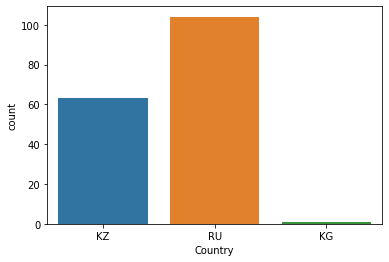

In [74]:
import seaborn as sns

sns.countplot(df.Country)